In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings

In [6]:
df1 = pd.read_csv('data.csv', delimiter=',')
nRow, nCol = df1.shape
print(f'Tiene: {nRow} Filas: y {nCol} Columnas ')

Tiene: 3441197 Filas: y 7 Columnas 


In [7]:
print(df1.loc[61804])

Position                                                      5
Track Name                                                  NaN
Artist                                                      NaN
Streams                                                   16767
URL           https://open.spotify.com/track/1YqcGlCHNquxBhl...
Date                                                 2017-11-09
Region                                                       ec
Name: 61804, dtype: object


In [4]:
df1.replace('', np.nan, inplace=True)
##61806
print(df1.loc[61804])

Position                                                      5
Track Name                                                  NaN
Artist                                                      NaN
Streams                                                   16767
URL           https://open.spotify.com/track/1YqcGlCHNquxBhl...
Date                                                 2017-11-09
Region                                                       ec
Name: 61804, dtype: object


In [5]:
##61806
df1 = df1.dropna()
print(df1.isnull().sum())

Position      0
Track Name    0
Artist        0
Streams       0
URL           0
Date          0
Region        0
dtype: int64


In [6]:
df1.drop_duplicates()

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec
...,...,...,...,...,...,...,...
3441192,196,More Than You Know,Axwell /\ Ingrosso,2126,https://open.spotify.com/track/71bBFbfn2OBK5Qw...,2018-01-09,hk
3441193,197,Issues,Julia Michaels,2117,https://open.spotify.com/track/7vu0JkJh0ldukEY...,2018-01-09,hk
3441194,198,Tuo Fei Lun,Eason Chan,2112,https://open.spotify.com/track/0pmGleExiQyd0Hx...,2018-01-09,hk
3441195,199,面具,Alfred Hui,2102,https://open.spotify.com/track/58SUsgamkW6vFFq...,2018-01-09,hk


In [7]:
# Crear un diccionario para contar el número de veces que aparece cada canción
canciones = {}

# Iterar sobre las filas del DataFrame
for index, row in df1.iterrows():
    # Obtener el nombre de la canción y actualizar el diccionario
    cancion = row['Track Name']
    if cancion in canciones:
        canciones[cancion] += 1
    else:
        canciones[cancion] = 1
        
# Imprimir el resultado
for cancion, count in canciones.items():
    print(f'{cancion}: {count}')

Reggaetón Lento (Bailemos): 7277
Chantaje: 10447
Otra Vez (feat. J Balvin): 6791
Vente Pa' Ca: 6384
Safari: 6757
La Bicicleta: 5485
Ay Mi Dios: 5320
Andas En Mi Cabeza: 5670
Traicionera: 6139
Shaky Shaky: 3511
Vacaciones: 6026
Dile Que Tu Me Quieres: 5682
Let Me Love You: 14562
DUELE EL CORAZON: 3500
Chillax: 4781
Borro Cassette: 5059
One Dance: 12440
Closer: 15136
Starboy: 13221
Desde Esa Noche: 2658
Don't Wanna Know: 8699
La Gozadera: 2968
24K Magic: 10234
Me Llamas (feat. Maluma) - Remix: 6229
Cuatro Babys: 3928
My Way: 7010
Gyal You A Party Animal: 1448
Baila Conmigo: 854
Gyal You A Party Animal - Remix: 4205
We Don't Talk Anymore (feat. Selena Gomez): 11779
Por Fin Te Encontré: 2473
CAN'T STOP THE FEELING! (Original Song from DreamWorks Animation's "TROLLS"): 8651
Bailame Despacio: 4078
I Took A Pill In Ibiza - Seeb Remix: 9831
Hasta el Amanecer: 3397
Cold Water (feat. Justin Bieber & MØ): 9444
Bobo: 1760
Ya Me Enteré (feat. Nicky Jam) - Urban Version: 3852
In the Name of Love: 10

Surulapsi (Vain elämää kausi 7): 81
Bedroom Floor: 1272
Flicker: 53
Whiskey (feat. A$AP Rocky): 152
Kuka sen opettaa (Vain elämää kausi 7): 48
Nöyrä: 1
Forever: 112
Sydän vähän kallellaan (Vain elämää kausi 7): 39
Faking It - Radio Edit: 9
Minun tuulessa soi (Vain elämää kausi 7): 23
Vapaa (Vain elämää kausi 7): 21
Niin kaunis on hiljaisuus (Vain elämää kausi 7): 21
Renegade Master: 5
Anyway: 172
Plain Jane: 1641
Hei Vaan Moi: 7
Tää On Se Maa: 77
Glitteri: 75
All Falls Down: 2015
Sun Tahtiin: 15
Trouble: 185
All About You: 53
Take Her Place (feat. A R I Z O N A): 54
Burning: 594
When I Was Young: 80
Never Let You Go: 108
Boom Kah: 1
Rap Saved Me: 118
Cocaina: 41
Jodel: 12
Riisu Kokonaan: 26
Ihan liian leija (feat. JVG): 9
Pelasta: 63
Mitä Madonna Tekis?: 1
Tina Tönap: 1
Nelostie: 68
Vanhaa Sua: 58
One Flight Away: 42
Pimeetä (feat. Keko Salata & Juno & Heikki Kuula): 55
Polttomerkki: 18
Hutsut: 25
Incapable: 70
One Last Song: 450
Bad To The Bone: 1
Say It First: 290
Nössö: 64
Flossaa: 

戒不掉: 2
偏愛: 2
一諾千年: 23
慢慢習慣 - 電影 : 拆彈專家 主題曲: 6
脫胎換骨: 1
盼: 1
Moonglow: 1
Come Together: 35
NINANO: 3
Electric Touch: 4
That's What I Like - BLVK JVCK Remix: 1
雙人被: 2
證明・無解: 2
傻笑: 2
半夢半醒忽然之間: 7
Palette (Feat. G-DRAGON): 471
Ending Scene: 19
dlwlrma: 18
Jam Jam: 5
Black Out: 2
浪費: 184
Full Stop: 2
Fake Plastic Trees: 1
Dear Name: 2
Love Alone: 1
Song For You: 7
家家酒: 255
永遠別說永遠 - 繼承人電視劇片尾曲: 5
TOMBOY: 1
我愛他: 1
分手需要練習的: 9
火燒的寂寞: 1
這叫愛: 1
王妃: 1
我全都相信: 6
雨愛: 3
懼高症: 1
The Apprentice (feat. Rag'n'Bone Man, Zebra Katz & RAY BLK): 34
釘子花 - EDM Remix: 17
該死的冷戰: 42
我害怕: 24
Without U: 2
Something Just Like This - Alesso Remix: 7
One More Night: 57
T.O.U: 1
Promise: 15
J-Boy: 17
黑白: 13
belong (feat. DENM): 1
不是不愛: 5
想定下來: 2
Colors: 27
在愛情裡: 8
錯遇: 6
晚安曲: 1
我是我: 23
Where Do We Go - Ukulele Version: 5
Touch Me: 13
RUMOR: 48
聆聽者: 3
Side To Side - Slushii Remix: 6
你會不會變: 1
匿名的寶貝: 1
隱形人: 1
告解: 1
啵啦: 63
爛好人: 46
啪啪啪: 24
Hyperreal: 20
多想將一切做得完美 (電視劇《他們在畢業的前一天爆炸 二部曲》插曲): 15
江湖晚: 1
Hurt by You: 1
Human - Jim Eno 

Focus (feat. Hamza): 13
Salut: 22
Pics wie ein Fan: 18
Let's Go Amina: 31
Hoodi: 22
Ist es das was Ihr wollt (Intro): 8
So vieles noch vor - Bonustrack: 9
Kontrolle verloren - Bonustrack: 8
Ajajaj: 257
Is so: 8
Magnum - Bonustrack: 9
Rettung naht: 5
Hype: 46
Nutte hier bin ich: 7
Warum hasst ihr mich: 4
Wo ich hin will (Outro): 4
Irgendwo im Schwabenländle (Skit): 1
Irgendwann: 5
20 Prozent - Bonustrack: 2
Diese feurige Salsa Dip (Skit): 1
Battalion: 1
Patte: 1
Hätte niemals gedacht: 1
Nächstes mal - Bonustrack: 1
In der Hood: 1
Sirenen - Full Version: 16
Sie will: 207
Truth or Dare: 1
The Other - Stripped: 6
Standing: 6
Zenit: 4
Alles VVS: 2
Flex'n: 2
Gang für immer: 2
Mir gehört die Nacht: 1
Coogi: 1
Lebron: 1
On/Off Beziehung: 1
Von den fernen Bergen (feat. SXTN): 33
Hallo Helmut (Andere Farbe): 1
Nur noch Gucci: 444
Alles auf Rot: 142
Pagare Para Money (feat. Haftbefehl): 7
Lange Nächte in FFM: 7
Komm wir chillen (feat. Yonii & Bausa) - Bonustrack: 177
Matador (feat. Tommy): 8
Mond

The Rascal: 2
Mest Ondt: 1
Heldig: 50
The One I Need: 1
L.A.C.K.: 1
Vi En: 45
JACKPOT: 83
Linje H: 79
48 Timer: 28
Frihed: 11
John Oliver: 17
Moshpit: 9
Spiller Dum: 8
Håb: 1
1919: 9
Laila (feat. Jimilian): 73
Fint Rent Tøj: 29
Fremtiden: 52
Linking With You: 1
Fødselsdag (Hvem Bliver Du Kysset Af): 3
Regn: 1
Ung Kniv: 1
blå: 4
Aji Aji: 66
Skyldig: 68
Den Bedste Julesang Ever: 57
Hey Mor: 60
Om Igen: 19
Blow Me Away: 3
Dum: 1
Lille store verden - Bonus Track: 54
I En Stjerneregn Af Sne: 53
Jesus & Josefine: 51
Let Love Be Love: 49
Der' noget i december - Bonus Track: 47
Indifférent: 61
Ensom: 61
Koldt Udenfor: 58
Farfar sang: 56
Ik Tænk På Det: 12
Ved Det Godt: 51
Flawless: 60
Jul i Angora: 45
Drømte Mig En Lille Drøm: 41
Jul Det' Cool: 40
Pakken: 40
Raindrops (Skit): 4
Tinka: 44
Bedøver: 1
Rockin' Around the Christmas Tree: 27
Når Sneen Falder: 39
Jul På Vesterbro: 39
Kold December: 33
It's Hard to Be a Nissemand: 36
Den Himmelblå: 33
Ca Ca: 47
Jalousi: 19
Kæreste: 7
De Værste Bedste 

Strong: 2
Keep Your Head Up: 3
Winter Winds: 2
Little Things: 2
Hometown Glory [Single Version]: 2
Beneath Your Beautiful: 2
Somewhere Only We Know: 43
No Words: 128
How I Met My Ex: 25
Like I Can: 2
Nasty Girl - Explicit "New Edit": 2
Smack That - Dirty: 3
Golden Slumbers: 35
I'm Feeling It (In The Air) - Sunset Bros X Mark McCabe: 53
Body and Mind: 6
Gritty Picture: 2
Decline: 110
Rolling in the Deep: 2
Steal My Girl: 2
Keep On Reaching: 2
It’s A Beautiful World: 3
Dead In The Water - Live At RTÉ 2FM Studios, Dublin: 2
Be Careful What You Wish For: 2
Cry Me a River: 2
Bad (feat. Yungen, MoStack, Mr Eazi & Not3s): 59
The Little Things That Give You Away: 2
Landlady: 1
Lonely This Christmas: 56
Dimelo - X Factor Recording: 74
Everybody Wants To Rule The World: 6
Stay Another Day: 42
I Have Nothing: 2
Wavey: 39
A Spaceman Came Travelling: 7
In Dulce Jubilo: 12
Rockin' Robin: 8
Christmas Time (Don’t Let The Bells End): 6
Here Comes Santa Claus: 6
Christmas Wrapping: 6
When a Child Is Bor

In [8]:
# crear un array con los valores de count de cada cancion
song_counts = np.array(list(canciones.values()))
print(song_counts)

# Calcular el percentil deseado 
percentile = np.percentile(song_counts, 95) # con 45 solo contarian las canciones que aperecen 7 o mas veces
#el objetivo es eliminar canciones con muy pocas apariciones para reducir el ruido
print(percentile)

# crear un diccionario con las canciones que aparecen al menos el umbral de veces
filtered_songs = {song: count for song, count in canciones.items() if count >= percentile}
canciones_total = len(filtered_songs)
print(f'La cantidad de canciones presentes actualmente es : {canciones_total}')
valor_min_aparicion = min(filtered_songs.values())
print(f'El valor minimo de apariciones de una cancion es de: {valor_min_aparicion}')


[ 7277 10447  6791 ...     2     1     1]
488.2000000000007
La cantidad de canciones presentes actualmente es : 930
El valor minimo de apariciones de una cancion es de: 489


In [9]:
# Crear una lista con los nombres de las canciones que se van a conservar
canciones_conservar = list(filtered_songs.keys())
print(len(df1))



# Filtrar el dataframe con las canciones a conservar
df_filtrado = df1[df1['Track Name'].isin(canciones_conservar)]

# Verificar el resultado
print(df_filtrado.tail(n=5))

print(len(df_filtrado))


# Calcular la media
media = df_filtrado['Streams'].mean()
print(f'La media es : {media}')
# Calcular la varianza
varianza = df_filtrado['Streams'].var()
print(f'La varianza es : {varianza}')
print(df_filtrado.dtypes)

3440540
         Position          Track Name              Artist  Streams  \
3441190       194  Castle on the Hill          Ed Sheeran     2134   
3441191       195   Whatever It Takes     Imagine Dragons     2130   
3441192       196  More Than You Know  Axwell /\ Ingrosso     2126   
3441193       197              Issues      Julia Michaels     2117   
3441196       200          Let Her Go           Passenger     2088   

                                                       URL        Date Region  
3441190  https://open.spotify.com/track/6PCUP3dWmTjcTtX...  2018-01-09     hk  
3441191  https://open.spotify.com/track/4IWAyPf1KMq7JCy...  2018-01-09     hk  
3441192  https://open.spotify.com/track/71bBFbfn2OBK5Qw...  2018-01-09     hk  
3441193  https://open.spotify.com/track/7vu0JkJh0ldukEY...  2018-01-09     hk  
3441196  https://open.spotify.com/track/2jyjhRf6DVbMPU5...  2018-01-09     hk  
2597931
La media es : 58255.80373343249
La varianza es : 52045649034.9728
Position       in

In [10]:
warnings.filterwarnings('ignore')

# Agrupar el dataframe por canción y país
agrupado = df_filtrado.groupby(['Track Name', 'Region'])

# Recorrer cada grupo y calcular el número medio de visitas por dia
for nombre, grupo in agrupado:
    # Obtener el número de dias que aparece la canción en el país
    num_dias = len(grupo['Date'].unique())

    # Calcular el número medio de visitas
    visitas_por_dia = grupo['Streams'].sum() / num_dias

    # Actualizar la columna 'Visitas por dia' con el número medio de visitas por dia
    df_filtrado.loc[(df_filtrado['Track Name'] == nombre[0]) & (df_filtrado['Region'] == nombre[1]), 'Visita_Media'] = visitas_por_dia.copy()

In [11]:
# Calcular la media de Streams por Artist y Region
media_streams_por_artist_region = df_filtrado.groupby(['Artist', 'Region'])['Streams'].mean()

# Actualizar el valor de Visita_media_Artist con la media de Streams por Artist y Region
df_filtrado['Visitas_media_Artist'] = df_filtrado.apply(lambda x: media_streams_por_artist_region[(x['Artist'], x['Region'])], axis=1)

# Mostrar el dataframe con la nueva columna
print(df_filtrado)

         Position                  Track Name              Artist  Streams  \
0               1  Reggaetón Lento (Bailemos)                CNCO    19272   
1               2                    Chantaje             Shakira    19270   
2               3   Otra Vez (feat. J Balvin)       Zion & Lennox    15761   
3               4                Vente Pa' Ca        Ricky Martin    14954   
4               5                      Safari            J Balvin    14269   
...           ...                         ...                 ...      ...   
3441190       194          Castle on the Hill          Ed Sheeran     2134   
3441191       195           Whatever It Takes     Imagine Dragons     2130   
3441192       196          More Than You Know  Axwell /\ Ingrosso     2126   
3441193       197                      Issues      Julia Michaels     2117   
3441196       200                  Let Her Go           Passenger     2088   

                                                       URL     

## Analisis exploratorio

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2597931 entries, 0 to 3441196
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Position              int64  
 1   Track Name            object 
 2   Artist                object 
 3   Streams               int64  
 4   URL                   object 
 5   Date                  object 
 6   Region                object 
 7   Visita_Media          float64
 8   Visitas_media_Artist  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 198.2+ MB
None
         Position      Streams  Visita_Media  Visitas_media_Artist
count  2597931.00   2597931.00    2597931.00            2597931.00
mean        87.17     58255.80      58537.00              58255.80
std         56.60    228135.16     206921.07             191054.86
min          1.00      1001.00       1001.00               1001.00
25%         38.00      3072.00       3329.41               3651.19
50%         81.00      8322.00  

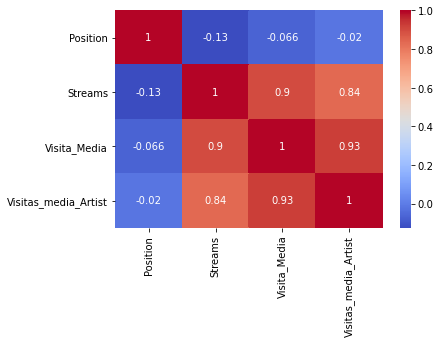

                      Position   Streams  Visita_Media  Visitas_media_Artist
Position              1.000000 -0.125120     -0.065770             -0.019556
Streams              -0.125120  1.000000      0.902481              0.837463
Visita_Media         -0.065770  0.902481      1.000000              0.925573
Visitas_media_Artist -0.019556  0.837463      0.925573              1.000000
              variables       VIF
0              Position  1.063232
1          Visita_Media  7.572206
2  Visitas_media_Artist  7.711485


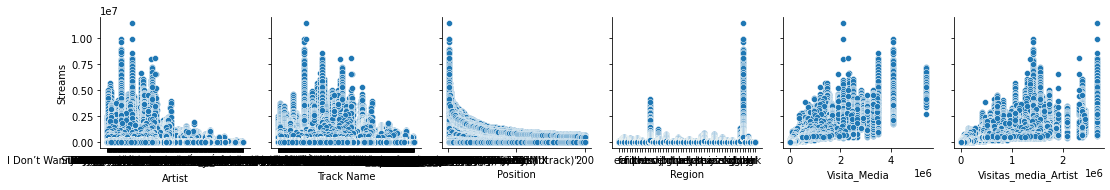

In [12]:
# Mostramos la información básica del DataFrame
print(df_filtrado.info())

# Mostramos las estadísticas descriptivas del DataFrame
#print(df_filtrado.describe())
print(df_filtrado.describe().apply(lambda x: round(x, 2)).to_string())

# Mostramos la correlación entre las variables
corr = df_filtrado.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()
print(df_filtrado.corr())


# Selecciona sólo las columnas numéricas
numeric_cols = ['Position', 'Visita_Media', 'Visitas_media_Artist']
X = df_filtrado[numeric_cols]

# Calcula el VIF para cada variable
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Imprime los resultados
print(vif)

# Mostramos la distribución de la variable dependiente
#sns.displot(df_filtrado['Streams'])
#plt.show()

# Mostramos la relación entre la variable dependiente y las variables independientes
sns.pairplot(df_filtrado, y_vars=['Streams'], x_vars=['Artist', 'Track Name', 'Position', 'Region', 'Visita_Media','Visitas_media_Artist'])
plt.show()

In [13]:
import mysql.connector

# Conectarse a la base de datos
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="312714"
)

# Crear la base de datos si no existe
mycursor = mydb.cursor()
mycursor.execute("CREATE DATABASE IF NOT EXISTS TFM")
print("Base de datos creada con éxito")

# Conectarse a la base de datos recién creada
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="312714",
  database="TFM"
)


mycursor = mydb.cursor()
mycursor.execute("DROP TABLE IF EXISTS mi_tabla")
print("Tabla eliminada con éxito")


# Creación de la tabla si no existe
mycursor = mydb.cursor()
mycursor.execute("CREATE TABLE IF NOT EXISTS mi_tabla (Track_Name VARCHAR(255), Artist VARCHAR(255), Position INT, Streams INT, Visita_Media FLOAT, Visitas_media_Artist FLOAT,Date VARCHAR(255), Region VARCHAR(255))")
print("Tabla creada con éxito")

# Insertar los datos
for index, row in df_filtrado.iterrows():
    sql = "INSERT INTO mi_tabla (Position, Visita_Media, Visitas_media_Artist, Streams, Artist, Track_Name, Date, Region) VALUES (%s, %s, %s, %s, %s, %s, %s,%s)"
    val = (row['Position'], row['Visita_Media'], row['Visitas_media_Artist'], row['Streams'], row['Artist'], row['Track Name'], row['Date'], row['Region'])
    mycursor.execute(sql, val)
print("Datos insertados con éxito")
# Confirmar los cambios en la base de datos
mydb.commit()

# Cerrar la conexión
mydb.close()

Base de datos creada con éxito
Tabla eliminada con éxito
Tabla creada con éxito
Datos insertados con éxito


# Posibles modelos que quedaron descartados: 
### regresion de poisson:

Es importante tener en cuenta que, para usar la regresión de Poisson, deberiamos cumplir la suposición de que la varianza de la variable dependiente es igual a su media. Si esto no se cumple, se puede considerar la regresión de Poisson con sobredispersión o la regresión de Poisson negativa, que son modelos que permiten una mayor varianza que la media.


Pero en este caso, como la varianza es mucho mayor que la media, no se cumple la suposición de que la varianza de la variable dependiente es igual a su media, lo que sugiere una sobredispersión en los datos. Por lo tanto, la regresión de Poisson convencional no sería adecuada para este caso.

En lugar de eso, se podría considerar el uso de la regresión de Poisson con sobredispersión o la regresión negativa de Poisson. La regresión de Poisson con sobredispersión permite una varianza mayor que la media y se puede ajustar utilizando un modelo de regresión binomial negativo. Por otro lado, la regresión negativa de Poisson es un modelo alternativo que también permite una mayor varianza que la media y se puede ajustar utilizando un modelo de regresión negativa de Poisson.

Ambos modelos, la regresión de Poisson con sobredispersión y la regresión negativa de Poisson, son modelos que se ajustan a datos de conteo con sobredispersión y pueden ser opciones adecuadas para modelar los datos de visualizaciones de las canciones, aunque tras realizar un serie de pruebas este modelo quedó descartado 

### Regresion binomial negativa

La Regresión Binomial Negativa es una técnica de modelado estadístico utilizada para analizar la relación entre una variable dependiente discreta (como "Streams") y varias variables independientes continuas o categóricas. Esta técnica se usa comúnmente en big data, especialmente en conjuntos de datos con una gran cantidad de variables independientes y observaciones


## Problema con las variables categóricas

En nuestro caso con tantas posibles categorías en cada variable, si se convierten en variables numéricas utilizando el enfoque de "one-hot encoding" (también conocido como "dummy coding"), se generaría una gran cantidad de nuevas columnas, lo que aumentaría el tamaño de los datos y puede llevar a problemas de eficiencia computacional y a la maldición de la dimensionalidad.

Una solución común para manejar variables categóricas en la regresión lineal es utilizar técnicas de codificación adecuadas, como la codificación de etiquetas o la codificación de frecuencias. En la codificación de etiquetas, se asigna un número entero único a cada categoría. En la codificación de frecuencias, se utiliza la frecuencia de cada categoría en los datos para asignar un número único. Ambas técnicas permiten que las variables categóricas se conviertan en variables numéricas, sin aumentar el número de columnas en el conjunto de datos.
Presi